In [1]:
# Material last updated: 15 Oct 2022
# Note materials were designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
    <script> code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script>
    <form action="javascript:code_toggle()"><input type="submit" value="Hide/show all code."></form>
''')

# Group 3 - Trends in Step Activity across the Week


### Driving Question
introduce driving question... 
Our group wants to study the trends in the week in step activity...

### Methodology
Using Pandas, Matplotlib and python.

### WIP - improvements
All code last updated: 23/10/2022

Notable TODOs:
- Literate Programming for code
- Explain each result in words
- 

### Results
Describe and comment the most important results.

### Suggested next steps
Write personal reports

# Setup

### Library import
We import all the required Python libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from pathlib import Path

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



### Data import
We retrieve all the required data for the analysis.

Datasets for:
* Participant 1
* Participant 2
* Participant 3
* Participant 4
* Participant 5
* Participant 7
* Participant 8
* Rainfall
* Sun exposure

A copy of the raw datasets are made and this is the dataset that we will use in our analysis

In [3]:
# Include data paths
dataset_path = Path('../../datasets')
add_dataset_path = Path('../../datasets/additional')
# Import datasets
raw_data_p1 = pd.read_csv(dataset_path / 'Participant-01.csv')
p1 = raw_data_p1.copy()

raw_data_p2 = pd.read_csv(dataset_path / 'Participant-02-detail.csv')
p2 = raw_data_p2.copy()

raw_data_p3 = pd.read_csv(dataset_path / 'Participant-03.csv')
p3 = raw_data_p3.copy()

raw_data_p4 = pd.read_csv(dataset_path / 'Participant-04.csv')
p4 = raw_data_p4.copy()


raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
p5 = raw_data_p5.copy()

raw_data_p7 = pd.read_csv(dataset_path / 'Participant-07.csv')
p7 = raw_data_p7.copy()

raw_data_p8 = pd.read_csv(dataset_path / 'Participant-08.csv')
p8 = raw_data_p8.copy()

# for climate datasets the year month day are separated i need them to be together therefore i parsed them together
raw_data = pd.read_csv(add_dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()

raw_data2 = pd.read_csv(add_dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()

# Data processing

The dataset are cleaning depending on  the format of the data as detailed datasets (Participant 2, 5) and weather data has different columns in comparison to other datasets.

The dataset's column names are all renamed so they are the same.


In [4]:
# i want to create a function that subs in the dataset for the following operations so I don't have to repeat these steps
def sub(data):
#     convert start,finish columns to datetime formats
    data['Start'] = pd.to_datetime(data['Start'])
    data['Finish'] = pd.to_datetime(data['Finish'])
#     extract the weekday name, month names and date in YYYY-MM-DD format from start column
    data['WeekDay'] = data['Start'].dt.day_name()
    data['Month'] = data['Start'].dt.month_name()
    data['Year'] = data['Start'].dt.year
    data['Date'] = data['Start'].dt.date
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     week days are ordered so that it's matches the order that day of the week are.
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

    
# function for detail data
def subdetail(data):
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     extract week day and month from date
    data['WeekDay'] = data['Date'].dt.day_name()
    data['Month'] = data['Date'].dt.month_name()
    data['Year'] = data['Date'].dt.year
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

    

    
# function for weather dataset
def subw(data):
#     extract week day and month from date
    data['Month'] = data['Date'].dt.month_name()
    data['WeekDay'] = data['Date'].dt.day_name()
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

In [5]:
# now sub the datasets into the functions
sub(p1)
subdetail(p2)
sub(p3)
sub(p4)
subdetail(p5)
sub(p7)
sub(p8)
subw(sydrain)
subw(sun)

# change count name so it matches format of non-detail datasets
p1 = p1.rename(columns={'Steps (count)':'Steps'})
p2 = p2.rename(columns={'Count':'Steps'})
p3 = p3.rename(columns={'Steps (count)':'Steps'})
p4 = p4.rename(columns={'Steps (count)':'Steps'})
p5 = p5.rename(columns={'Count':'Steps'})
p7 = p7.rename(columns={'Steps (count)':'Steps'})
p8 = p8.rename(columns={'Steps (count)':'Steps'})

# will now drop the duplicates as identified by duplicated testing 
p2.drop_duplicates(keep=False, inplace=True)
p5.drop_duplicates(keep=False, inplace=True)


#     dataset contains data points from both their mobile phone and smartwatch, 
# aggregating would resulting in duplicate data. We keep only data from the smartwatch as it is usually more accurate
p2 = p2[p2['Source'].str.contains('Watch')]


# group by hour as detailed datasets has more than one record for each hour incomparision to the non-detailed datasets.
p2 = p2.groupby(['Date','Hour']).agg({'Steps':'sum','WeekDay':'first','Month':'first','Year':'first','Source':'first'}).reset_index()
p5 = p5.groupby(['Date','Hour']).agg({'Steps':'sum','WeekDay':'first','Month':'first','Year':'first','Source':'first'}).reset_index()

## Data Exploration

Our intital assumption for the trend across the week is that step count will be higher during the weekday due to work and school having a higher requirement to commute more.


In [6]:
# first group the data by dates, so we can see how many steps are made each day
day = p1.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day2 = p2.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day3 = p3.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day4 = p4.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day5 = p5.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day7 = p7.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day8 = p8.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})


First taking a look at the data distribution to view the mean and median values of the data.

In [31]:
# only use data from 2022 as often 1 hour from december is included which is zero
n = day.loc[day['Date'].dt.year == 2022]
# view the distribution of the data for participant 1
n.describe()

,Steps,Week
count,245.000000,245.000000
mean,8606.732286,18.138776
std,4022.477363,10.464476
min,723.000000,1.000000
25%,5992.000000,9.000000
50%,7957.000000,18.000000
75%,10405.000000,27.000000
max,25660.398309,52.000000


In [34]:
n.loc[n['Steps']==n['Steps'].min()]

,Date,Steps,WeekDay,Month,Week
142,2022-05-22,723.0,Sunday,May,20


In [33]:
n.loc[n['Steps']==n['Steps'].max()]

,Date,Steps,WeekDay,Month,Week
158,2022-06-07,25660.398309,Tuesday,June,23


In [35]:
def graphavg(df):
    week_avg = df.groupby(['WeekDay'])['Steps'].mean().reset_index()
    fig = px.bar(week_avg, x='WeekDay', y='Steps',title="Average Step Count for Days of the Week")
    fig.update_layout(title_text='Average Step Count for Days of the Week', title_x=0.5)
    fig.show()
    print(week_avg)

graphavg(day)

     WeekDay        Steps
0     Monday  8431.311956
1    Tuesday  8487.778389
2  Wednesday  9804.571996
3   Thursday  8673.243336
4     Friday  7792.062730
5   Saturday  8455.888777
6     Sunday  8379.638452


In [11]:
# first sort the dates into what weeks they are in the year
day['Week'] =  day['Date'].dt.isocalendar().week
day2['Week'] =  day2['Date'].dt.isocalendar().week
day3['Week'] =  day3['Date'].dt.isocalendar().week
day4['Week'] =  day4['Date'].dt.isocalendar().week
day5['Week'] =  day5['Date'].dt.isocalendar().week
day7['Week'] =  day7['Date'].dt.isocalendar().week
day8['Week'] =  day8['Date'].dt.isocalendar().week

# I wanted to drop the week 52 which is from 2021 and not 2022 but first made a copy so the data is not lost
newday = day.copy()
newday.drop(newday[newday['Week'] == 52].index, inplace = True)
newday2 = day2.copy()
newday2.drop(newday2[newday2['Week'] == 52].index, inplace = True)
newday2.drop(newday2[newday2['Week'] == 40].index, inplace = True)
newday3 = day3.copy()
newday3.drop(newday3[newday3['Week'] == 52].index, inplace = True)
newday4 = day4.copy()
newday4.drop(newday4[newday4['Week'] == 52].index, inplace = True)
newday5 = day5.copy()
newday5.drop(newday5[newday5['Week'] == 52].index, inplace = True)
newday7 = day7.copy()
newday7.drop(newday7[newday7['Week'] == 52].index, inplace = True)
newday8 = day8.copy()
newday8.drop(newday8[newday8['Week'] == 52].index, inplace = True)

newday["Is Weekend"] = newday['Date'].dt.dayofweek > 4
newday2["Is Weekend"] = newday2['Date'].dt.dayofweek > 4
newday3["Is Weekend"] = newday3['Date'].dt.dayofweek > 4
newday4["Is Weekend"] = newday4['Date'].dt.dayofweek > 4
newday5["Is Weekend"] = newday5['Date'].dt.dayofweek > 4
newday7["Is Weekend"] = newday7['Date'].dt.dayofweek > 4
newday8["Is Weekend"] = newday8['Date'].dt.dayofweek > 4

df = newday.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df2 = newday2.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df3 = newday3.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df4 = newday4.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df5 = newday5.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df7 = newday7.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()
df8 = newday8.groupby(['Is Weekend','Week']).agg({'Steps': 'mean'}).reset_index()

In [12]:
import plotly.express as px 

# Initialize figure
fig = go.Figure()

# Add Traces

wkdf = df.loc[df["Is Weekend"]==True]
wddf = df.loc[df["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf["Week"], y=wkdf["Steps"],name='Participant 1 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf["Week"], y=wddf["Steps"],name='Participant 1 Weekday'))

wkdf2 = df2.loc[df2["Is Weekend"]==True]
wddf2 = df2.loc[df2["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf2["Week"], y=wkdf2["Steps"],name='Participant 2 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf2["Week"], y=wddf2["Steps"],name='Participant 2 Weekday'))

wkdf3 = df3.loc[df3["Is Weekend"]==True]
wddf3 = df3.loc[df3["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf3["Week"], y=wkdf3["Steps"],name='Participant 3 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf3["Week"], y=wddf3["Steps"],name='Participant 3 Weekday'))

wkdf4 = df4.loc[df4["Is Weekend"]==True]
wddf4 = df4.loc[df4["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf4["Week"], y=wkdf4["Steps"],name='Participant 4 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf4["Week"], y=wddf4["Steps"],name='Participant 4 Weekday'))

wkdf5 = df5.loc[df5["Is Weekend"]==True]
wddf5 = df5.loc[df5["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf5["Week"], y=wkdf5["Steps"],name='Participant 5 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf5["Week"], y=wddf5["Steps"],name='Participant 5 Weekday'))

wkdf7 = df7.loc[df7["Is Weekend"]==True]
wddf7 = df7.loc[df7["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf7["Week"], y=wkdf7["Steps"],name='Participant 7 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf7["Week"], y=wddf7["Steps"],name='Participant 7 Weekday'))

wkdf8 = df8.loc[df8["Is Weekend"]==True]
wddf8 = df8.loc[df8["Is Weekend"]!=True]
fig.add_trace(
    go.Scatter(x=wkdf8["Week"], y=wkdf8["Steps"],name='Participant 8 Weekend'))
fig.add_trace(
    go.Scatter(x=wddf8["Week"], y=wddf8["Steps"],name='Participant 8 Weekday'))
# fig.show()
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Participant 1",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, False, False,False, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 1",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Participant 2",
                     method="update",
                     args=[{"visible": [False, False, True, True,False, False, False,False, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 2",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Participant 3",
                     method="update",
                     args=[{"visible": [False, False, False, False,True, True, False,False, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 3",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Participant 4",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True,True, False, False, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 4",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Participant 5",
                     method="update",
                     args=[{"visible": [False, False, False, False, False,False,False,False, True, True, False, False, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 5",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Participant 7",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False,False, False, False, True, True, False,False]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 7",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Participant 8",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,False,False, False, False, False, False, True,True]},
                           {"title": "Weekend vs WeekDay: Number of steps made by Participant 8",
                           'xaxis': {'title': 'Week'},
                          'yaxis': {'title': 'Average Step Count'}}])
                
            ]),
        )
    ])
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 1', title_x=0.5)
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 2', title_x=0.5)
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 3', title_x=0.5)
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 4', title_x=0.5)
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 5', title_x=0.5)
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 7', title_x=0.5)
fig.update_layout(title_text='Weekend vs WeekDay: Number of steps made by Participant 8', title_x=0.5)

In [13]:
# looking at the average between weekday vs weekend
df.groupby(['Is Weekend']).agg({'Steps': 'mean'})

,Steps
Is Weekend,
False,8682.319754
True,8342.609603


# Sub Questions

### Does the week day step patterns differ month to month?

In [14]:
def getMonths(input, m1, m2, m3):
    return input.loc[(input.Date.dt.month==m1) | (input.Date.dt.month==m2) | (input.Date.dt.month==m3)]

Autumn = getMonths(day,3,4,5)
Winter = getMonths(day,6,7,8)
Summer = getMonths(day,12,1,2)

Aut = Autumn.groupby('WeekDay').agg({'Steps':'mean'}).reset_index()
Win = Winter.groupby('WeekDay').agg({'Steps':'mean'}).reset_index()
Sum = Summer.groupby('WeekDay').agg({'Steps':'mean'}).reset_index()

# Initialize figure
fig = go.Figure()

# Add Traces
fig.add_trace(
    go.Bar(name='Summer', x=Sum["WeekDay"], y=Sum['Steps'],marker_color='rgb(240, 90, 101)'))

fig.add_trace(
    go.Bar(name='Autumn', x=Aut["WeekDay"], y=Aut['Steps'],marker_color='rgb(250, 148, 34)'))

fig.add_trace(
    go.Bar(name='Winter', x=Win["WeekDay"], y=Win['Steps'],marker_color='rgb(83, 205, 241)'))
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Seasons",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "Average step count of days of the week over in different seasons",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Summer",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Average step count of days of the week over in Summer",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Autumn",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Average step count of days of the week over in Autumn",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Winter",
                     method="update",
                     args=[{"visible": [False,False, True]},
                           {"title": "Average step count of days of the week over in Winter",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}])
                
                
            ]),
        )
    ])
fig.update_layout(
    title_x=0.5,
    
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15, # gap between bars of adjacent location coordinates.
        bargroupgap=0.1 # gap between bars of the same location coordinate.
    )


In [15]:
def graphmonth(df): 
        # order the months
    cat2 = ['December','January','February','March','April','May','June','July','August','September']
    cat2_type = CategoricalDtype(categories=cat2, ordered=True)
    df['Month'] = df['Month'].astype(cat2_type)
    
    # group by month and weekday and get mean step count for all 3 participants
    week_month_count = df.groupby(['Month','WeekDay']).agg({'Steps': 'mean','Date':'first'}).reset_index()
   
    sns.set_theme(style="dark")

    # Plot each months's step count for day of the week.
    g = sns.relplot(
        data=week_month_count,
        x="WeekDay", y="Steps", col="Month", hue="Month",
        kind="line", palette="crest", linewidth=1, zorder=5,
        col_wrap=5, height=4, aspect=1.5, legend=False
    )

    # Iterate over each subplot to customize further
    for Month, ax in g.axes_dict.items():
        # Rotate the xticks by 90 degrees  
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
        # Add the title for the months as an annotation within the plot
        ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")


    # Tweak the supporting aspects of the plot
    g.set_titles("Monthly step trends of the week")
    g.set_axis_labels("Day of the Week", "Steps (count)")
    g.tight_layout()

C:\Users\autum\AppData\Local\Temp/ipykernel_4212/3229942830.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



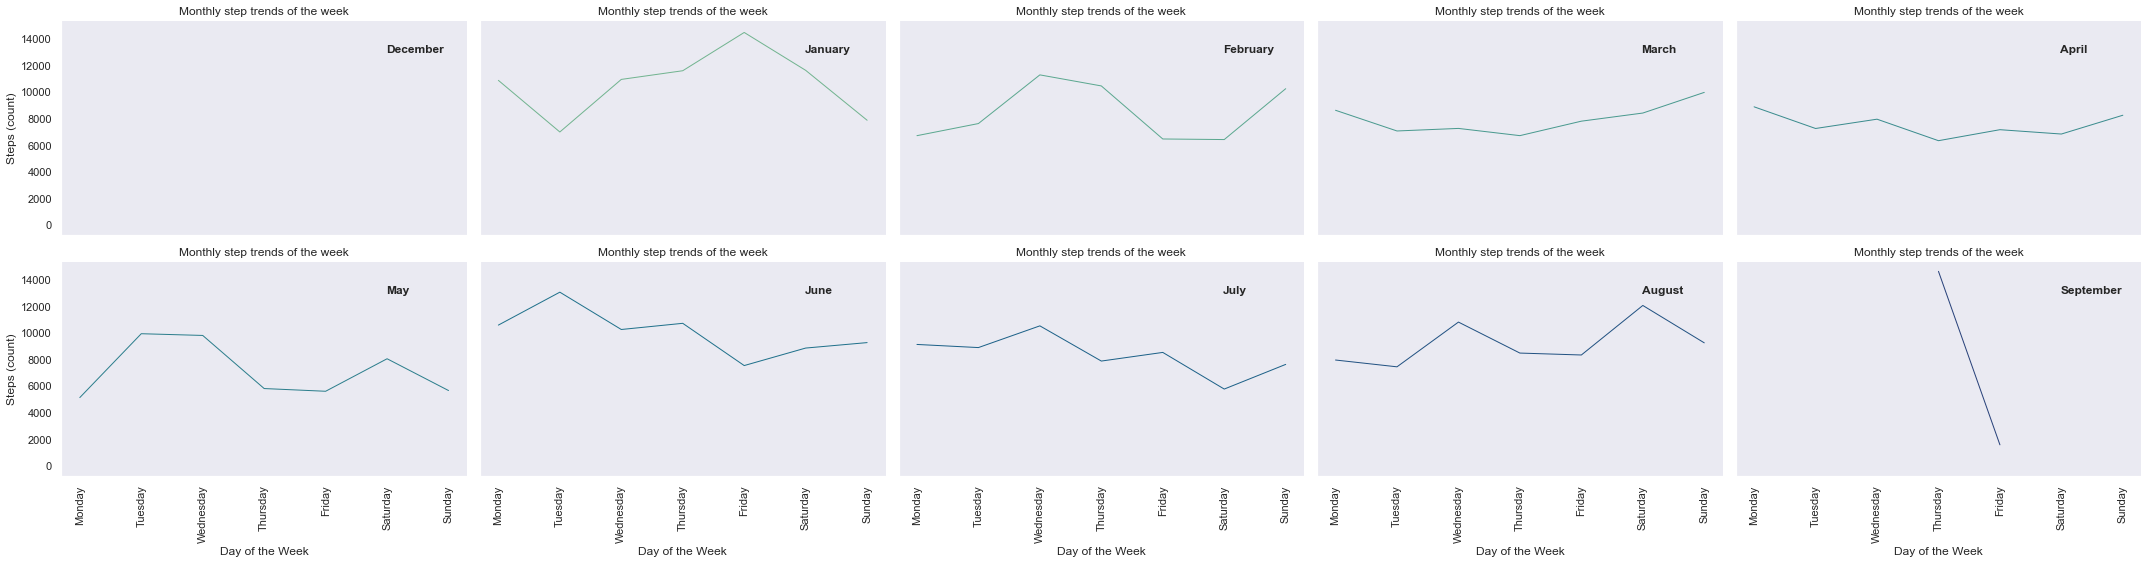

In [16]:
graphmonth(day)

In [17]:
def hmmonth(df):
    cat2 = ['December','January','February','March','April','May','June','July','August','September']
    cat2_type = CategoricalDtype(categories=cat2, ordered=True)
    hm = df.groupby(['Month','WeekDay']).agg({'Steps': 'mean'}).reset_index()
    hm['Month'] = hm['Month'].astype(cat2_type)
    hm = hm.pivot("Month", "WeekDay", "Steps")
    fig = px.imshow(hm,color_continuous_scale='YlGn',title='Monthly Average Step Count for Days of the Week')
    fig.update_layout(title_text='Monthly Average Step Count for Days of the Week', title_x=0.5,coloraxis_colorbar_x=0.7)
    fig.show()

hmmonth(day)

### What are the trends for hourly step count data across the week?

In [18]:
p1['Hour'] = p1['Start'].dt.hour
p3['Hour'] = p3['Start'].dt.hour
p4['Hour'] = p4['Start'].dt.hour
p7['Hour'] = p7['Start'].dt.hour
p8['Hour'] = p8['Start'].dt.hour

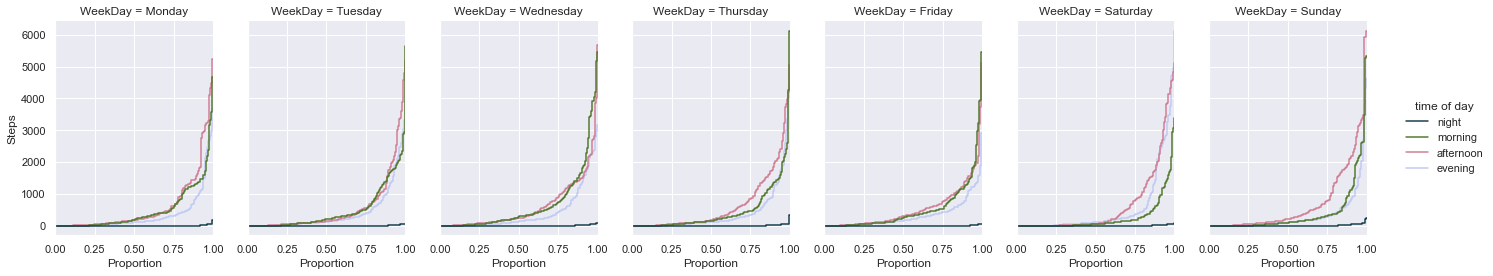

In [19]:
def graphhour(df):
    df["time of day"] = pd.qcut(df["Hour"], 4, labels = ["night", "morning", "afternoon", "evening"])
    
    sns.set(style="darkgrid") 
    plot = sns.displot(
        data=df, y="Steps", hue="time of day", col='WeekDay',
        kind="ecdf", height=4, aspect=.7, palette="cubehelix"
    )

graphhour(p1)

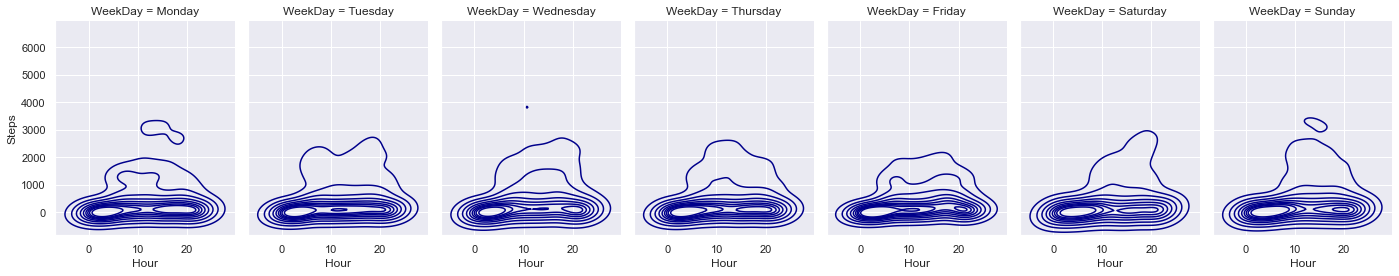

In [20]:
def graphhour2(df):
    plot = sns.displot(
        data=df, y="Steps", col='WeekDay',
        x = "Hour", kind = 'kde', height=4, aspect = .7, color = 'darkblue'
    )

graphhour2(p1)

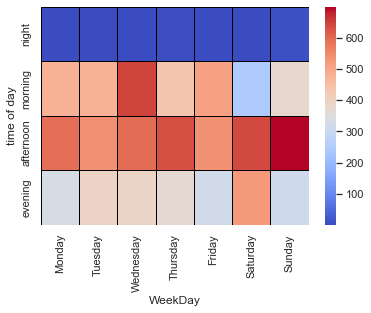

In [21]:
def graphhour3(df):
    df["time of day"] = pd.qcut(df["Hour"], 4, labels = ["night", "morning", "afternoon", "evening"])
    # obtain the mean step counts for each hour of each day of the week
    hour_dow_count = df.groupby(['time of day','WeekDay']).agg({'Steps': 'mean'}).reset_index()
    # change the format such that each cell contains a step count value
    hour_dow_count = hour_dow_count.pivot("time of day", "WeekDay", "Steps")
    # change the order of the days of the week
    hour_dow_count = hour_dow_count.reindex(
        columns = [
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday'])
    # plot the heatmap
    hmap = sns.heatmap(hour_dow_count, cmap="coolwarm", linewidths=.5, linecolor = 'black')

graphhour3(p1)

### Step Count Correlation with Weather

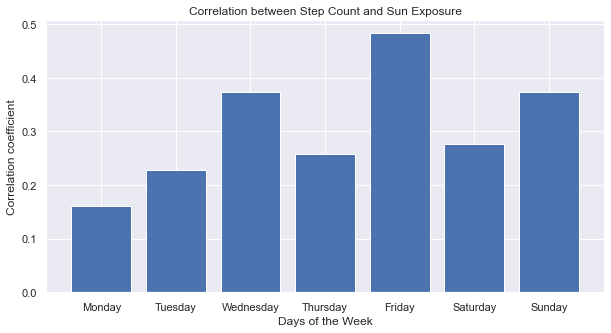

In [22]:
def graphsuncorr(df):
    test = pd.merge(df,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
    t2 = test.groupby(['WeekDay','Week']).agg({'Steps':'mean','Daily global solar exposure (MJ/m*m)':'mean'}).reset_index()
    cor = {}
    m = t2.loc[t2['WeekDay']=='Monday']
    t = t2.loc[t2['WeekDay']=='Tuesday']
    w = t2.loc[t2['WeekDay']=='Wednesday']
    th = t2.loc[t2['WeekDay']=='Thursday']
    f = t2.loc[t2['WeekDay']=='Friday']
    s = t2.loc[t2['WeekDay']=='Saturday']
    sn = t2.loc[t2['WeekDay']=='Sunday']

    cor['Monday'] = m['Steps'].corr(m['Daily global solar exposure (MJ/m*m)'])
    cor['Tuesday'] = t['Steps'].corr(t['Daily global solar exposure (MJ/m*m)'])
    cor['Wednesday'] = w['Steps'].corr(w['Daily global solar exposure (MJ/m*m)'])
    cor['Thursday'] = th['Steps'].corr(th['Daily global solar exposure (MJ/m*m)'])
    cor['Friday'] = f['Steps'].corr(f['Daily global solar exposure (MJ/m*m)'])
    cor['Saturday'] = s['Steps'].corr(s['Daily global solar exposure (MJ/m*m)'])
    cor['Sunday'] = sn['Steps'].corr(sn['Daily global solar exposure (MJ/m*m)'])


    plt.rcParams["figure.figsize"] = (10,5)
    plt.bar(range(len(cor)), list(cor.values()), align='center')
    plt.xticks(range(len(cor)), list(cor.keys()))
    plt.xlabel('Days of the Week') 
    plt.ylabel('Correlation coefficient') 
    plt.title("Correlation between Step Count and Sun Exposure")
    plt.show()

    
# use day# to get correlation graph for participant    
graphsuncorr(day)

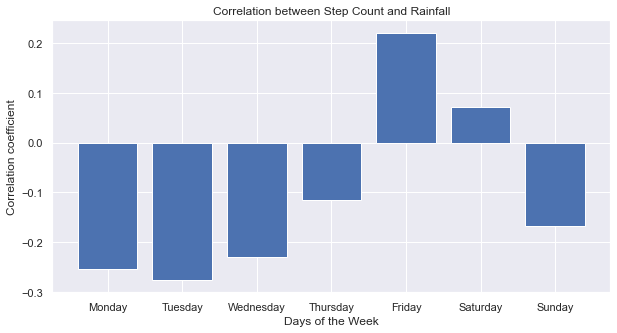

In [23]:
def graphrfcorr(df):
    test = pd.merge(df,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
    t2 = test.groupby(['WeekDay','Week']).agg({'Steps':'mean','Rainfall amount (millimetres)':'mean'}).reset_index()
    cor = {}
    m = t2.loc[t2['WeekDay']=='Monday']
    t = t2.loc[t2['WeekDay']=='Tuesday']
    w = t2.loc[t2['WeekDay']=='Wednesday']
    th = t2.loc[t2['WeekDay']=='Thursday']
    f = t2.loc[t2['WeekDay']=='Friday']
    s = t2.loc[t2['WeekDay']=='Saturday']
    sn = t2.loc[t2['WeekDay']=='Sunday']

    cor['Monday'] = m['Steps'].corr(m['Rainfall amount (millimetres)'])
    cor['Tuesday'] = t['Steps'].corr(t['Rainfall amount (millimetres)'])
    cor['Wednesday'] = w['Steps'].corr(w['Rainfall amount (millimetres)'])
    cor['Thursday'] = th['Steps'].corr(th['Rainfall amount (millimetres)'])
    cor['Friday'] = f['Steps'].corr(f['Rainfall amount (millimetres)'])
    cor['Saturday'] = s['Steps'].corr(s['Rainfall amount (millimetres)'])
    cor['Sunday'] = sn['Steps'].corr(sn['Rainfall amount (millimetres)'])


    plt.rcParams["figure.figsize"] = (10,5)
    plt.bar(range(len(cor)), list(cor.values()), align='center')
    plt.xticks(range(len(cor)), list(cor.keys()))
    plt.xlabel('Days of the Week') 
    plt.ylabel('Correlation coefficient') 
    plt.title("Correlation between Step Count and Rainfall")
    plt.show()
    
    
# use day# to get correlation graph for participant    
graphrfcorr(day)

### How frequently does the participant reaches the recommended 7,500 and 10,000-step goal?

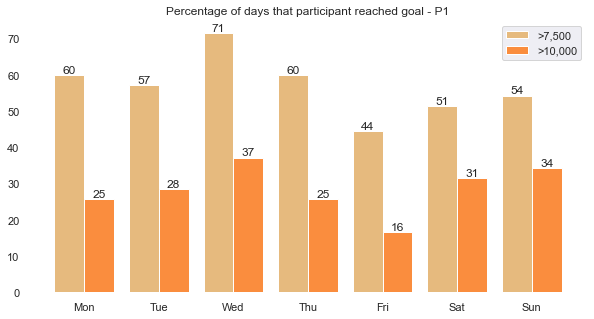

In [24]:
daily_sums_p1 = p1.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p2 = p2.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p3 = p3.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p4 = p4.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p5 = p5.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p7 = p7.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
daily_sums_p8 = p8.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()

def plot_weekday_patterns(daily_sums, suffix):
    weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    num_weekday_days = daily_sums.groupby('WeekDay').size()
    p_days_7500 = daily_sums[daily_sums['Steps'] > 7500].groupby('WeekDay').size() / num_weekday_days * 100
    p_days_10000 = daily_sums[daily_sums['Steps'] > 10000].groupby('WeekDay').size() / num_weekday_days * 100

    x = np.arange(7)
    width = 0.4

    fig, ax = plt.subplots()

    bar_7500 = ax.bar(x - width / 2, p_days_7500, width=width, color='#E6BA7E', label='>7,500')
    ax.bar_label(bar_7500, fmt='%d')
    bar_10000 = ax.bar(x + width / 2, p_days_10000, width=width, color='#FA8D3E', label='>10,000')
    ax.bar_label(bar_10000, fmt='%d')

    ax.set(frame_on=False)
    plt.title(f'Percentage of days that participant reached goal - {suffix}')
    plt.xticks(x, labels=weekdays)
    plt.legend()
    plt.show()

plot_weekday_patterns(daily_sums_p1, 'P1')

### What is the composition of activity for days of the week?

,WeekDay,<5k,5k-10k,>10k
0,Monday,5,21,9
1,Tuesday,9,16,10
2,Wednesday,4,18,13
3,Thursday,5,21,9
4,Friday,6,24,6
5,Saturday,7,17,11
6,Sunday,7,16,12


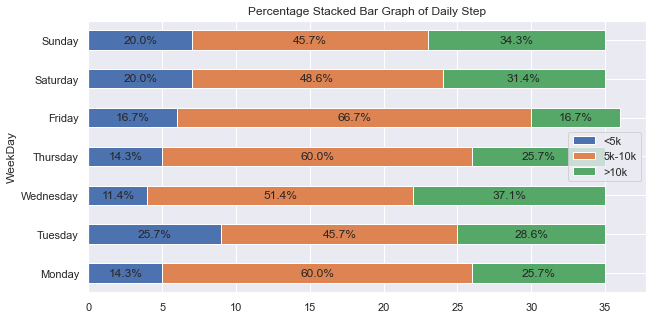

In [25]:
def sub_q(df):
    df = df.groupby('Date').agg({'Steps':'sum','WeekDay':'first'}).reset_index()
    # df = df.assign(Health_index = lambda x: (x['Steps']))
    df.loc[df['Steps'] < 10000,'Step_index'] = '5k-10k'
    df.loc[df['Steps'] < 5000,'Step_index'] = '<5k'
    df.loc[df['Steps'] > 10000,'Step_index'] = '>10k'
    df = df[['WeekDay','Step_index']].copy()
    cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=False)
    df['WeekDay'] = df['WeekDay'].astype(cat_type)
    # grouped = df.groupby(by = ['Weekday','Step_index']).count()
    df = pd.get_dummies(df['Step_index']).groupby(df['WeekDay']).sum().reset_index()
    df = df.loc[:,['WeekDay','<5k','5k-10k','>10k']]
    df.plot(
        x = 'WeekDay',
        kind = 'barh',
        stacked = True,
        title = 'Percentage Stacked Bar Graph of Daily Step',
        mark_right = True)
    df_total = df['<5k'] + df['5k-10k'] + df['>10k']
    df_rel = df[df.columns[1:]].div(df_total, 0)*100

    for n in df_rel:
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                             df[n], df_rel[n])):
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                     va = 'center', ha = 'center')
    return df

sub_q(p1)

### Does inactivity differ weekday vs weekend?

In [26]:


def graphinact(p):
    inact = p.copy()
    inact.loc[(inact['Steps'] <= 30) & (inact['Steps'] > 0 ), 'Inactive Hour'] = 1
    inact.loc[inact['Steps'] > 30, 'Inactive Hours'] = 0
    inact = inact.groupby(['Date'], as_index=False).agg({'Steps': 'sum','Inactive Hour':'sum','WeekDay': 'first','Month': 'first'})

    wkday = inact.groupby(['WeekDay']).agg({'Inactive Hour':'mean'}).reset_index()
    fig = px.bar(wkday, x='WeekDay', y='Inactive Hour',title="Inactivity over the days of the week")
    fig.show()

graphinact(p1)



# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2